action 00,01,10,11 依序是往右,上,左,下 

In [1]:
import numpy as np
from qiskit import *

In [2]:
Unitary_Matrix_1 = [[0,0,0,1],
                    [1,0,0,0],         
                    [0,1,0,0],
                    [0,0,1,0]]
Unitary_Matrix_2 = [[0,1,0,0],
                    [0,0,1,0],
                    [0,0,0,1],
                    [1,0,0,0]]

'''
Go_Down = Unitary_Matrix_1
Go_Right = Unitary_Matrix_1
Go_Up = Unitary_Matrix_2
Go_Left = Unitary_Matrix_2
'''

'\nGo_Down = Unitary_Matrix_1\nGo_Right = Unitary_Matrix_1\nGo_Up = Unitary_Matrix_2\nGo_Left = Unitary_Matrix_2\n'

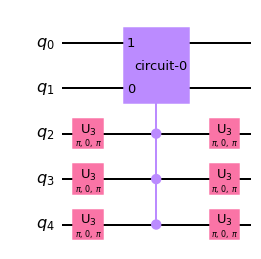

In [3]:
#建好往右的control-unitary
qc = QuantumCircuit(2)
qc.unitary(Unitary_Matrix_1,[0,1])
control_qc = qc.control(3)
control_qc.draw('mpl')
Go_Right = control_qc.to_gate()
test_circuit = QuantumCircuit(5,name='Right')
test_circuit.x([2,3,4])
test_circuit.append(Go_Right,[2,3,4,1,0]) #Gate的第0個位置對到Quantum Circuit的第2個位置，以此類推
test_circuit.x([2,3,4])
Decision_right_control_unitary = test_circuit.to_gate() #Decision_right_control_unitary就是往右的control-unitary
New_circuit = QuantumCircuit(5)
New_circuit.append(Decision_right_control_unitary,[0,1,2,3,4])

#control_qc.draw('mpl')
test_circuit.decompose().draw('mpl')
#test_circuit.measure([0,1,2,3,4],[4,3,2,1,0])
test_circuit.draw('mpl')
New_circuit.decompose().decompose().draw('mpl')
#qc.draw('mpl')
#qc.draw('mpl')
#Go_Right = Go_Down
#type(Go_Right)

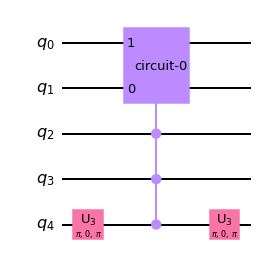

In [4]:
#建好往下的control-unitary
#往下的unitary和往右的unitary相同，只是target qubit不同！還有q2,q3沒有x gate,因為要探測的是11，11代表往下
test2_circuit = QuantumCircuit(5,name = 'Down')
Go_Down = control_qc.to_gate()
test2_circuit.x(4)
test2_circuit.append(Go_Down,[2,3,4,1,0])
test2_circuit.x(4)
Decision_down_control_unitary = test2_circuit.to_gate() #Decision_down_control_unitary就是往下的control-unitary
test2_circuit.decompose().draw('mpl')

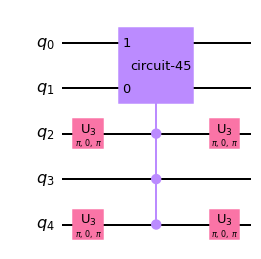

In [5]:
#建好往上的control-unitary
qc2 = QuantumCircuit(2)
qc2.unitary(Unitary_Matrix_2,[0,1])
control_qc2 = qc2.control(3)
control_qc2.draw('mpl')
Go_Up = control_qc2.to_gate()
test3_circuit = QuantumCircuit(5,name = 'Up')
test3_circuit.x([2,4])
test3_circuit.append(Go_Up,[2,3,4,1,0])
test3_circuit.x([2,4])
Decision_up_control_unitary = test3_circuit.to_gate() #Decision_up_control_unitary就是往上的control-unitary
test3_circuit.decompose().draw('mpl')

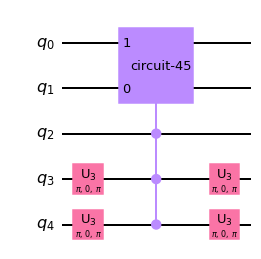

In [6]:
#建好往左的control-unitary
test3_circuit = QuantumCircuit(5,name = 'Left')
Go_Left = control_qc2.to_gate()
test3_circuit.x([3,4])
test3_circuit.append(Go_Left,[2,3,4,1,0])
test3_circuit.x([3,4])
Decision_left_control_unitary = test3_circuit.to_gate() #Decision_left_control_unitary就是往左的control-unitary
test3_circuit.decompose().draw('mpl')

In [7]:
#判斷是否掉到洞裡面的gate
#看有幾個洞就要幾個gate

#6號洞
hole1 = QuantumCircuit(5,name = 'Hole1')
hole1.x([0,2])
hole1.mct([0,1,2,3],4)
hole1.x([0,2])
hole1 = hole1.to_gate()
#hole1 = hole1.to_gate()
#8號洞
hole2 = QuantumCircuit(5,name = 'Hole2')
hole2.x(0)
hole2.mct([0,1,2,3],4)
hole2.x(0)
hole2 = hole2.to_gate()
#12號洞
hole3 = QuantumCircuit(5,name = 'Hole3')
hole3.x(1)
hole3.mct([0,1,2,3],4)
hole3.x(1)
hole3 = hole3.to_gate()
#13號洞
hole4 = QuantumCircuit(5,name = 'Hole4')
hole4.x([2,3])
hole4.mct([0,1,2,3],4)
hole4.x([2,3])
hole4 = hole4.to_gate()

In [8]:
#判斷是否結束的gate
#只需要一個gate因為終點只有一個
finish = QuantumCircuit(5,name = 'Finish')
finish.x([1,3])
finish.mct([0,1,2,3],4)
finish.x([1,3])
finish = finish.to_instruction()

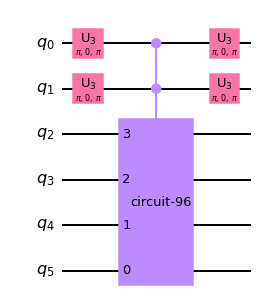

In [9]:
#每走一步，若沒有掉到洞裡或到終點，reward就減1
reward_unitary = [[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                  [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
reward_qc = QuantumCircuit(4)
reward_qc.unitary(reward_unitary,[0,1,2,3])
control_reward = reward_qc.control(2)
control_reward.draw('mpl')
gate_version = control_reward.to_gate()
reward = QuantumCircuit(6,name = 'Reward')
reward.x([0,1])
reward.append(gate_version,[0,1,5,4,3,2])
reward.x([0,1])
Reward_Gate = reward.to_gate()
#reward.measure([0,1,2,3,4,5],[5,4,3,2,1,0])
reward.decompose().draw('mpl')

In [ ]:
#踩到洞，reward就減4
punish_unitary = [[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
                  [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
                  [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
                  [0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0]]
punish_qc = QuantumCircuit(4)

In [10]:
#看最後qubit是0或是1
# from qiskit.providers.aer import QasmSimulator
# backend = QasmSimulator()
# qc_compiled = transpile(, backend)
# job_sim = backend.run(qc_compiled, shots=1024)
# result_sim = job_sim.result()
# counts = result_sim.get_counts(qc_compiled)
# print(counts)

In [11]:
#statevector simulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex
sv = Statevector.from_label('000')
sv = sv.evolve(qc)
array_to_latex(sv)

<IPython.core.display.Latex object>

In [12]:
#試跑circuit
backend = Aer.get_backend('statevector_simulator')
job = backend.run(test_circuit)
result = job.result()
print(result)

Simulation failed and returned the following error message:
ERROR: Failed to load qobj: AerSimulator: circuit with instructions {"instructions": {save_statevector, gate}, "gates": {x, c_circuit-0}} is not compatible with any available simulation methods


Result(backend_name='statevector_simulator', backend_version='0.9.0', qobj_id='', job_id='d3a34f70-0afb-44aa-9164-fce31c7f5e16', success=False, results=[], date=2021-10-25T16:37:34.574946, status=ERROR: Failed to load qobj: AerSimulator: circuit with instructions {"instructions": {save_statevector, gate}, "gates": {x, c_circuit-0}} is not compatible with any available simulation methods, metadata={}, time_taken=0.0006959438323974609)


In [13]:
qc2 = QuantumCircuit(2)
qc2.unitary(Unitary_Matrix_2,[0,1])
control_qc2 = qc2.control(3)
control_qc2.draw('mpl')
Go_Up = control_qc2.to_gate()
Go_Left = control_qc2.to_gate()

<ipython-input-14-433ae3417fc2>:10: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  combine_circuit = add_x1 + new_circuit + add_x2
/Applications/anaconda3/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:933: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


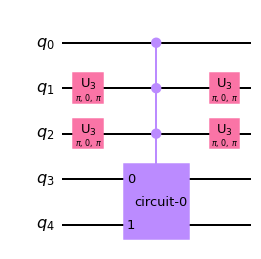

In [14]:
#Test Block
new_circuit = QuantumCircuit(5)
add_x1 = QuantumCircuit(5)
add_x1.x(3)
add_x1.x(2)
add_x2 = QuantumCircuit(5)
add_x2.x(3)
add_x2.x(2)
new_circuit.append(Go_Down, [4,3,2,1,0])
combine_circuit = add_x1 + new_circuit + add_x2
test = combine_circuit.to_gate()
new2_circuit = QuantumCircuit(5)
new2_circuit.append(test,[4,3,2,1,0])
new2_circuit.decompose().decompose().draw('mpl')
#combine_circuit.draw('mpl')
#new_circuit.draw('mpl')
#combine_circuit.decompose().draw('mpl')

In [15]:
Environment = QuantumRegister(4, 'env')
Action = QuantumRegister(2, 'act')
End_Qubit = QuantumRegister(1, 'end')
Finish_Qubit = QuantumRegister(1, 'fin')
Reward_Qubit = QuantumRegister(4, 'rew')

In [16]:
circuit = QuantumCircuit(Environment, Action, End_Qubit, Finish_Qubit, Reward_Qubit, ClassicalRegister(12))
circuit.x([8,9,10,11])
circuit.h([4,5])
circuit.append(Decision_right_control_unitary,[2,3,4,5,6])
circuit.append(Decision_left_control_unitary,[2,3,4,5,6])
circuit.append(Decision_down_control_unitary,[0,1,4,5,6])
circuit.append(Decision_up_control_unitary,[0,1,4,5,6])
circuit.append(hole1,[0,1,2,3,6])
circuit.append(hole2,[0,1,2,3,6])
circuit.append(hole3,[0,1,2,3,6])
circuit.append(hole4,[0,1,2,3,6])
circuit.append(finish,[0,1,2,3,7])
circuit.append(Reward_Gate,[6,7,8,9,10,11])
circuit.barrier()
circuit.measure([0,1,2,3,4,5,6,7,8,9,10,11],[11,10,9,8,7,6,5,4,3,2,1,0])

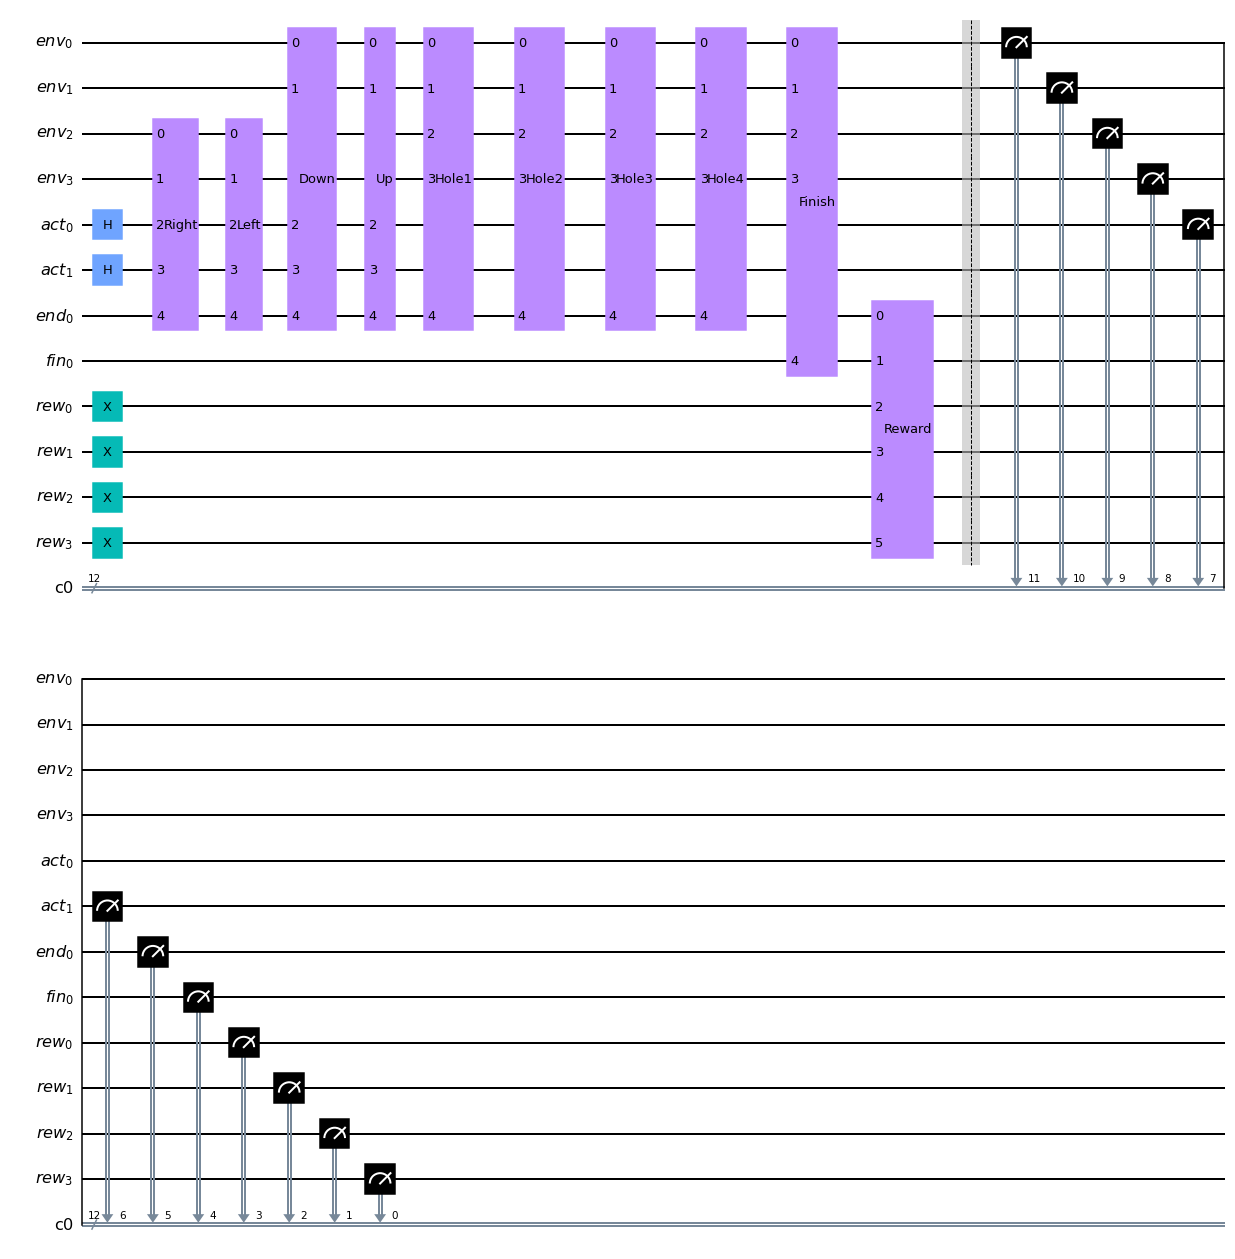

In [20]:
circuit.draw('mpl')

In [19]:
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(circuit, backend)
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'001110001110': 251, '000100001110': 257, '010011001110': 272, '110001101111': 244}
